In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("German Credit Data.csv")
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [4]:
df.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,1.000000


In [5]:
# ONE HOT ENCODING CATEGORICAL VARIABLES 

cat_vars = ["checkin_acc", "credit_history", "savings_acc", "present_emp_since", "personal_status", "inst_plans", "job"]
num_vars = ["duration", "amount", "inst_rate", "residing_since", "age", "num_credits", "status"]

for var in cat_vars:
  encoded_var = pd.get_dummies(df[cat_vars])
  df_encode = pd.concat([df[num_vars], encoded_var], axis=1)

df_encode.head()

,duration,amount,inst_rate,residing_since,age,num_credits,status,checkin_acc_A11,checkin_acc_A12,checkin_acc_A13,...,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A141,inst_plans_A142,inst_plans_A143,job_A171,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,42,7882,2,4,45,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0


### Q1: Use  the  German  credit  rating  dataset “German Credit Data.csv” , Decision  treeclassifierto  predict good  or  bad  credit.  Use  “sklearn.model_selection”    and  GridSearchCV  to  search  the  hyperparameter  values  and  report  the  most  optimal one.Configure the gridsearch to search for optimal parameters:•Splitting criteria: gini or entropy.•Maximum depth of decision tree ranging from 2 to 10.•The searching of optimal parameter will be validated using 10-fold cross validation and the most optimal parameter will be chosen based on ROC AUC score.

In [6]:
X = df_encode.drop("status",axis=1)
y = df_encode["status"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=1001)

depth = np.arange(2, 11, 1)

params = {"criterion":["gini", "entropy"],
          "max_depth":depth}

grid_search = GridSearchCV(DecisionTreeClassifier(), params, cv=10, scoring="roc_auc")

grid_search.fit(X_train,y_train)

print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'criterion': 'entropy', 'max_depth': 4}


In [8]:
model = DecisionTreeClassifier(criterion = "gini", max_depth = 4)

model.fit(X_train,y_train)
model.predict(X_test)

print("Accuracy: ", model.score(X_test,y_test))

Accuracy:  0.7


### Q2: Visualize the tree using graphviz software.

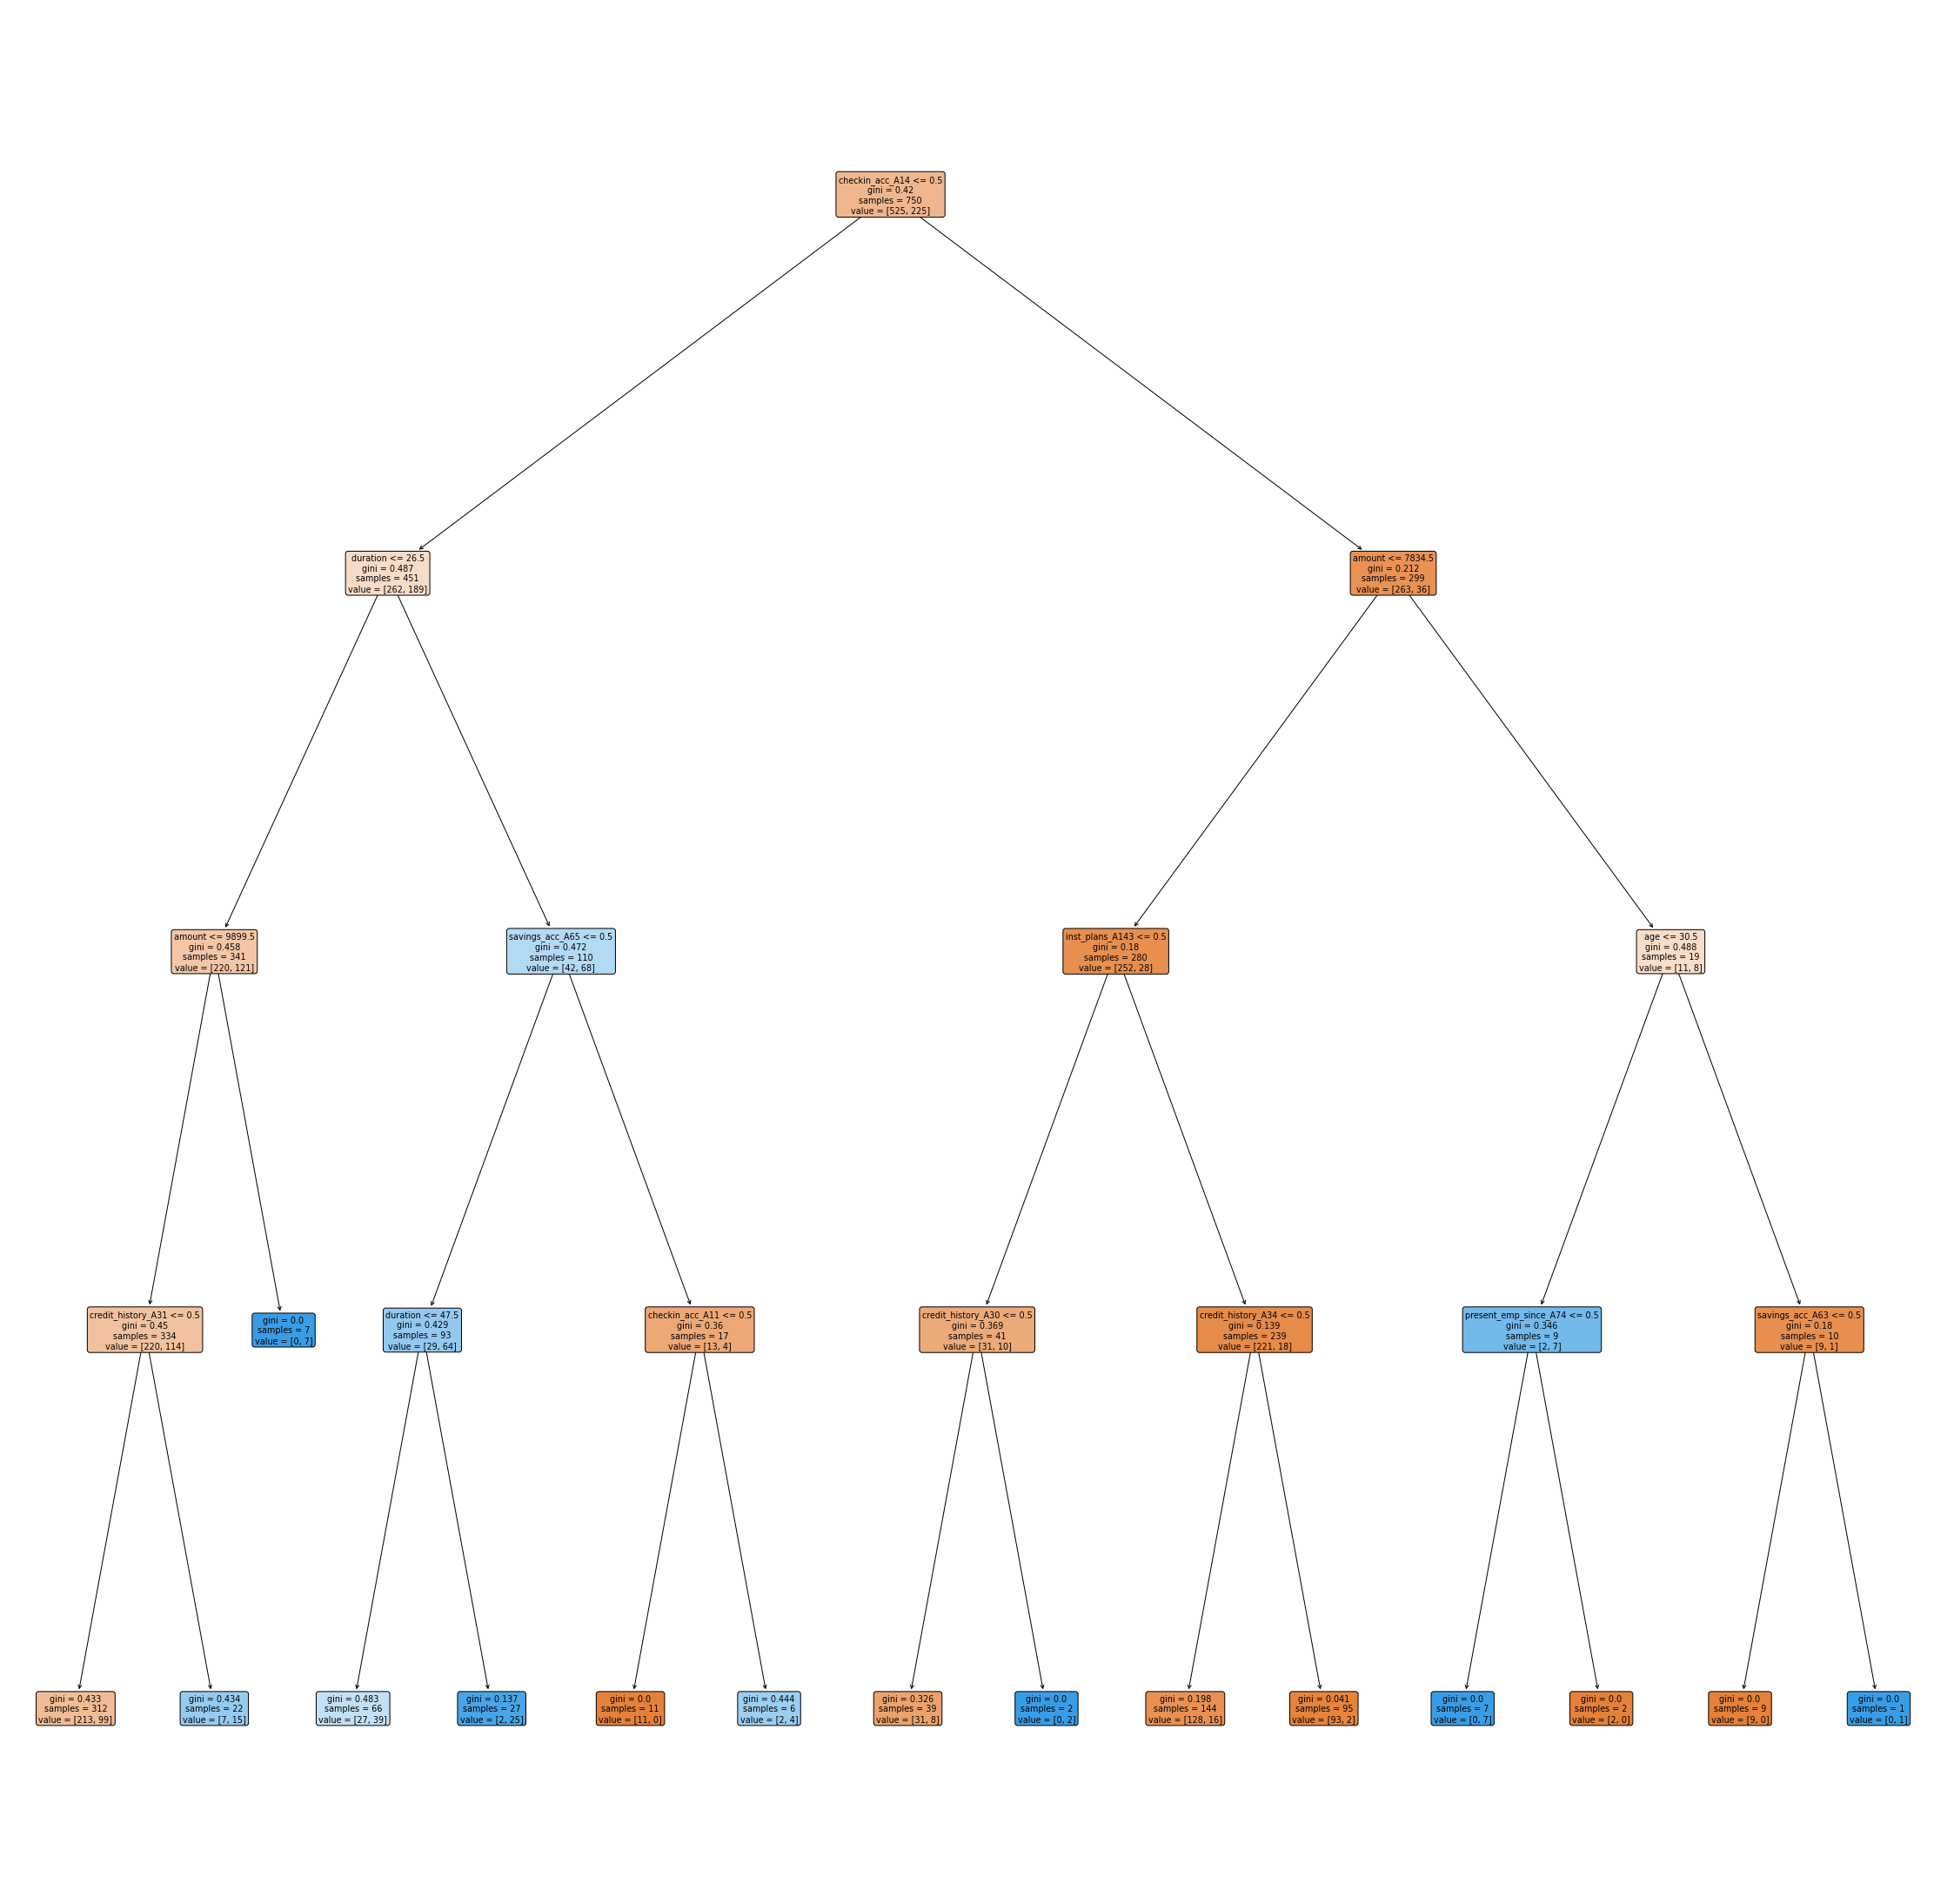

In [9]:
plt.figure(figsize = (40,40))
plot_tree(model,feature_names = list(X.columns), filled=True, rounded=True)
plt.show()

### Q3:  Display the text representation of the rules learnt.

In [10]:
rules = export_text(model,feature_names = list(X.columns))
print(rules)

|--- checkin_acc_A14 <= 0.50
|   |--- duration <= 26.50
|   |   |--- amount <= 9899.50
|   |   |   |--- credit_history_A31 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- credit_history_A31 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- amount >  9899.50
|   |   |   |--- class: 1
|   |--- duration >  26.50
|   |   |--- savings_acc_A65 <= 0.50
|   |   |   |--- duration <= 47.50
|   |   |   |   |--- class: 1
|   |   |   |--- duration >  47.50
|   |   |   |   |--- class: 1
|   |   |--- savings_acc_A65 >  0.50
|   |   |   |--- checkin_acc_A11 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- checkin_acc_A11 >  0.50
|   |   |   |   |--- class: 1
|--- checkin_acc_A14 >  0.50
|   |--- amount <= 7834.50
|   |   |--- inst_plans_A143 <= 0.50
|   |   |   |--- credit_history_A30 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- credit_history_A30 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- inst_plans_A143 >  0.50
|   |   |   |--- credit_history_A34 <= 0.50
|   |   |   |